In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("../yolo_runs/run_20250113/weights/best.pt")

In [3]:
results = model.predict(
    source="../yolo_dali_data/images/test/resized_img1_00009.jpg", 
    conf=0.25, 
    save=False, 
    project="../yolo_runs/predict_20250117"
)


image 1/1 /Users/samueljin/IdeaProjects/LLMs-from-scratch/DALI_Lab/notebook/../yolo_dali_data/images/test/resized_img1_00009.jpg: 512x512 222 bncls, 70.3ms
Speed: 1.3ms preprocess, 70.3ms inference, 4.2ms postprocess per image at shape (1, 3, 512, 512)


In [4]:
import sys
import os

# Get the absolute path of the src directory
src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [5]:
import importlib
import process_image
importlib.reload(process_image)

from process_image import show_bounding_boxes

this is a prediction result from a test fold. The image are random crops from labeled images.

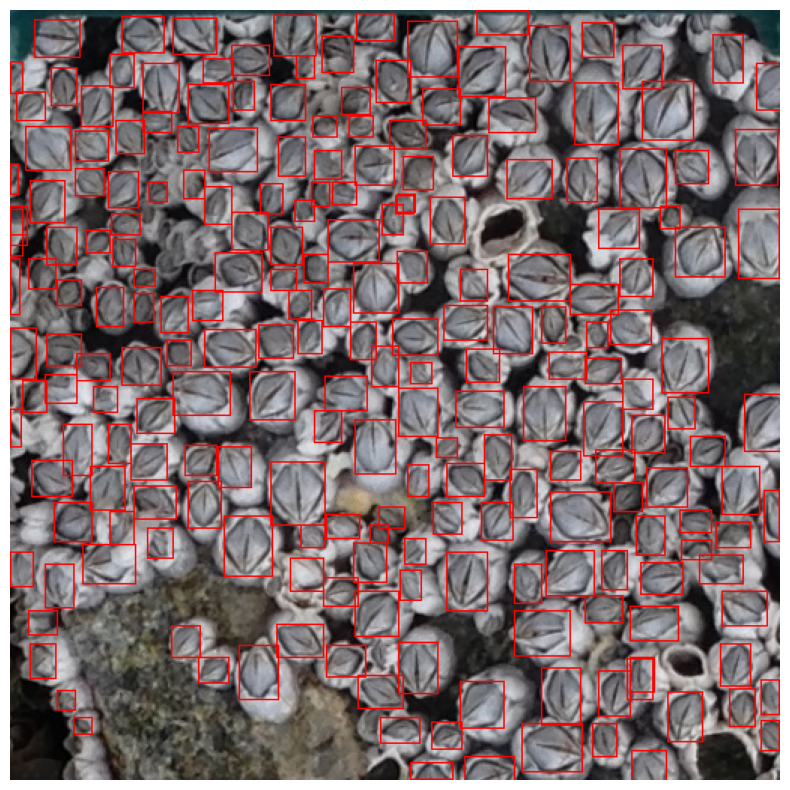

In [6]:
show_bounding_boxes(image_path="../yolo_dali_data/images/test/resized_img1_00009.jpg", results=results)

# test with unseen image

show the raw unseen image

In [7]:
image_path = "../Barnacles/unseen_img2.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)

NameError: name 'cv2' is not defined

In [20]:
import cv2

# Load the original image
image = cv2.imread(image_path)

# Resize the image to 512x512
resized_image = cv2.resize(image, (512, 512))

# Save the resized image as a JPG file
cv2.imwrite("../processed_images/unseen_img2.jpg", resized_image)

True

In [21]:
results = model.predict(
    source="../processed_images/unseen_img2.jpg", 
    conf=0.25, 
    save=False, 
    project="../yolo_runs/predict_20250117"
)


image 1/1 /Users/xiajin/projects/misc/DALI_Lab/notebook/../processed_images/unseen_img2.jpg: 512x512 146 bncls, 76.9ms
Speed: 4.0ms preprocess, 76.9ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


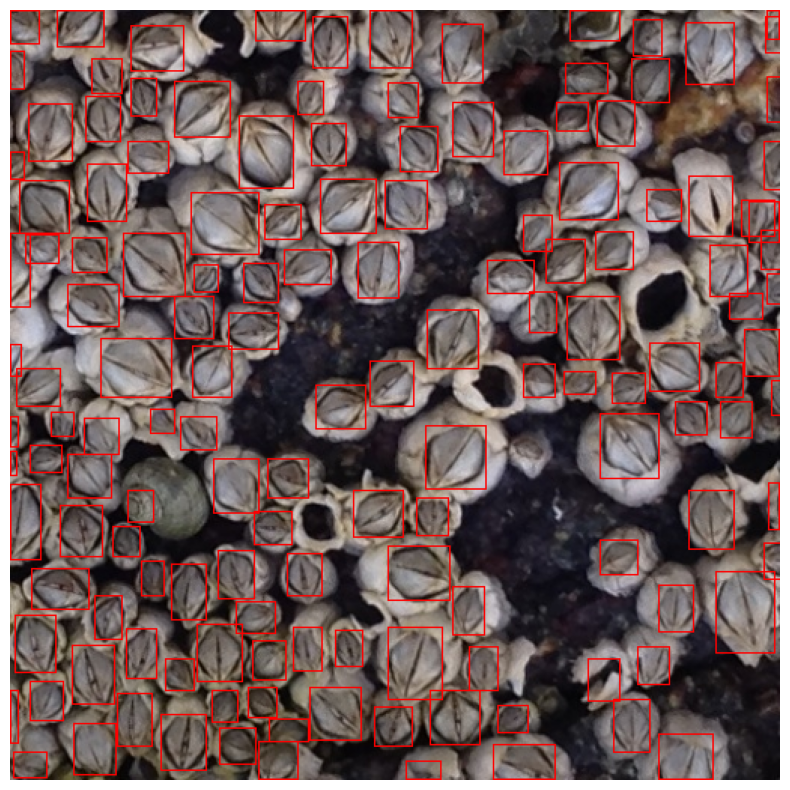

In [22]:
show_bounding_boxes(image_path="../processed_images/unseen_img2.jpg", results=results)

In [8]:
for result in results:
    # Bounding boxes
    boxes = result.boxes  # (x1, y1, x2, y2, confidence, class)
    for box in boxes:
        print(f"Box: {box.xyxy}, Confidence: {box.conf}, Class: {box.cls}")

Box: tensor([[142.0267, 336.0883, 174.0689, 376.1537]]), Confidence: tensor([0.9670]), Class: tensor([0.])
Box: tensor([[258.1376, 420.6104, 284.3731, 454.8964]]), Confidence: tensor([0.9558]), Class: tensor([0.])
Box: tensor([[359.9936, 320.5765, 399.8732, 353.2180]]), Confidence: tensor([0.9507]), Class: tensor([0.])
Box: tensor([[442.8983, 144.5193, 475.4138, 177.8069]]), Confidence: tensor([0.9503]), Class: tensor([0.])
Box: tensor([[420.1896,  47.9317, 454.6212,  86.4931]]), Confidence: tensor([0.9493]), Class: tensor([0.])
Box: tensor([[345.3562,  10.7752, 372.7115,  47.7843]]), Confidence: tensor([0.9435]), Class: tensor([0.])
Box: tensor([[433.4880, 218.9917, 464.4705, 254.8534]]), Confidence: tensor([0.9418]), Class: tensor([0.])
Box: tensor([[264.7342,   7.2425, 297.1402,  44.6118]]), Confidence: tensor([0.9350]), Class: tensor([0.])
Box: tensor([[ 80.2245, 288.2644, 104.3113, 312.0381]]), Confidence: tensor([0.9342]), Class: tensor([0.])
Box: tensor([[356.9141, 359.8823, 388